# Inaugural Project

$$
\begin{aligned}
c^{*}, l^{*}=arg \;\underset{c,l}{max} \;log(c)-v \cdot \frac{l^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}
\end{aligned}
$$

s.t. 

$$
x=m+wl-[\tau_0wl+\tau_1 \max{wl-\kappa,0}]\\
c\in[0,x]\\
l\in [0,1]
$$

We notice that because utility is monotically increasing the optimal consumption is given by 
$$
c^*=x
$$

Imports:

In [3]:
# First all used packages are loaded 
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve the maximization problem given in eq. (1), we define the variables, utility function labor supply, and set up our equilibrium of having consumption equal to total resources. We then maximize the utility function with respect to our constraints by printing the optimal labor supply, optimal consumption, and utility.

In [4]:
# Following variables is known
m   = 1
v   = 10
e   = 0.3
t0  = 0.4
t1  = 0.1
k   = 0.4
w   = 0.5

# Now the model equations are defined

def x(m,w,l,t0,t1,k): 
    """Budget constrain"""

    return m + w*l - (t0*w*l + t1*max(w*l-k,0))
# Defining the utility function
def utility(l,c,e,v):
    return math.log(c) - v * ((l** (1+(1/e)))/(1+ (1/e)))

# Setting consumption equal to budget
def labor_supply(l,e,v,m,w,t0,t1,k):
    c = x(m,w,l,t0,t1,k)
    return -utility(l,c,e,v)
# Defining the supply problem optimizer
def supply_problem(e,v,m,w,t0,t1,k):
    solution =  optimize.minimize_scalar(labor_supply,method='bounded', \
                bounds=(0,1), args=(e,v,m,w,t0,t1,k))
    l = solution.x
    c = x(m,w,l,t0,t1,k)
    u = utility(l,c,e,v)
    return l,c,u

# and the optimal values can now be printed as the constructed function solves eq. (1)
l_star = supply_problem(e,v,m,w,t0,t1,k)[0]
c_star = supply_problem(e,v,m,w,t0,t1,k)[1]
u_star = supply_problem(e,v,m,w,t0,t1,k)[2]

print(f'Optimized labour supply is: {l_star:.2f}')
print(f'Optimized consumption is:  {c_star:.2f}')
print(f'Optimal utility is: {u_star:.2f}')

Optimized labour supply is: 0.34
Optimized consumption is:  1.10
Optimal utility is: 0.08


# Question 2

To Plot $l^*$ and $c^*$ as a function of $w$ in the range of 0.5 and 1.5, we set up a vector $w_i$ that follows a uniform distribution as $w_i \sim U(0.5,1.5)$ with N = 10,000. Secondly, we empty the lists for $l$ and $c$ and generate a loop to return the optimal level of consumption and labor supply given the wage.

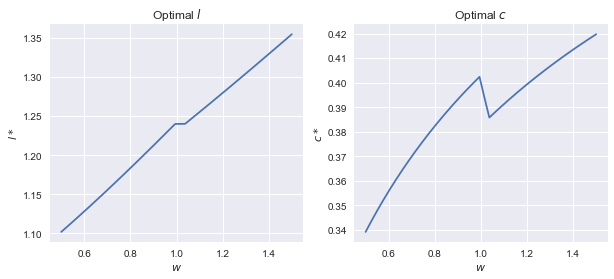

In [12]:
N = 10000
# vector of wages
w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
c_vec = np.empty(N)

for i, w in enumerate(w_vec):
    opt = supply_problem(e,v,m,w_vec[i],t0,t1,k)
    c_vec[i] = opt[0]
    l_vec[i] = opt[1]

# create the figures
import matplotlib.pyplot as plt
plt.style.use("seaborn")

fig = plt.figure(figsize=(10,4))

fig_w_l = fig.add_subplot(1,2,1)
fig_w_l.plot(w_vec,l_vec)

fig_w_l.set_title('Optimal $l$')
fig_w_l.set_xlabel('$w$')
fig_w_l.set_ylabel('$l*$')
fig_w_l.grid(True)

fig_w_c = fig.add_subplot(1,2,2)
fig_w_c.plot(w_vec,c_vec)

fig_w_c.set_title('Optimal $c$')
fig_w_c.set_xlabel('$w$')
fig_w_c.set_ylabel('$c*$')
fig_w_c.grid(True)

# Question 3

Total tax revenue is calculated and printed as a function of the number in the entire population and each individual in the population's tax revenue.

In [15]:
# A function to return the total tax revenue is created
np.random.seed(4600)
PopulationWageLarge = np.random.uniform(0.5,1.5,size=10000)

def TotalTax(PopulationWageVec,e,v,t0,t1,k,m):

#Return an array for individual tax payments
    N=len(PopulationWageVec)
    PopulationTaxes=np.zeros((N))

    for i,w in enumerate(PopulationWageVec):
        #Return optimal labour supply given optimize functions in Q1
        Ind_optimum=supply_problem(e,v,m,w,t0,t1,k)
        IndLabour=Ind_optimum[0]
        #Optimal invidual taxpayment with optimal labor
        PopulationTaxes[i]=t0*w*IndLabour+t1*max(w*IndLabour-k,0)
    #Sum
    TotTax=sum(PopulationTaxes)
    return TotTax

#Total tax functions with random uniform dis.
TotTax0 = TotalTax(PopulationWageLarge,e,v,t0,t1,k,m)
print(f'The total tax revenue is {TotTax0:.1f}')

The total tax revenue is 1627.2


# Question 4

We now change the Frisch elasticity of labor supply, $\epsilon$, from 0.3 to 0.1 and print the new tax revenue using the same formula as created in question 3.

In [16]:
# Frisch Elasticity changed from 0.3 to 0.1
e_new = 0.1

# The new total tax revenue can now be calculated and printed
TotTax_e_new = TotalTax(PopulationWageLarge,e_new,v,t0,t1,k,m)
print(f'The total tax revenue is {TotTax_e_new:.1f}')

The total tax revenue is 3191.2


# Question 5

To maximize the total tax revenue we define a vector that maximizes tax revenue, by finding new levels of $\tau_0$, $\tau_1$ and $\kappa$. We find the optimal tax level inbetween the previous found levels which also concludes the optimal level. 

In [18]:
# A smaller population size is defined to easen the calculations
PopulationWageSmall = np.random.uniform(0.5,1.5,size=100)

def value_of_choice_tax(taxes,PopulationWage,e,v,m):
    
    t0  = taxes[0]
    t1  = taxes[1]
    k   = taxes[2]
    return -TotalTax(PopulationWage,e,v,t0,t1,k,m)

# Finds the tax maximising values of the vector 'taxes'.
def taxOptimiser(PopulationWage,e,v,m):
    
    initial_guess   = [0.8,0.6,0.5]
    sol_case3       = optimize.minimize(
        value_of_choice_tax,initial_guess,method='Nelder-Mead',args=(PopulationWage,e,v,m))

    t0Star=sol_case3.x[0]
    t1Star=sol_case3.x[1]
    kStar=sol_case3.x[2]

    # Print the solution   
    print(f'Optimal standard income tax rate is {t0Star:.3f}')
    print(f'Optimal top bracet tax rate is {t1Star:.3f}')
    print(f'Optimal cut-off income is {kStar:.3f}')
    
    return[t0Star,t1Star,kStar]

print('Optimal taxe rates and revenue, with N=100')
[t0Star,t1Star,kStar]= taxOptimiser(PopulationWageSmall,e,v,m)
TotTaxSmall = TotalTax(PopulationWageLarge,e,v,t0Star,t1Star,kStar,m)
print(f'Total tax revenue = {TotTaxSmall:.2f}')

print('Optimal taxe rates and revenue, with N=10000')
[t0Star,t1Star,kStar]=taxOptimiser(PopulationWageLarge,e,v,m)
TotTaxLarge = TotalTax(PopulationWageLarge,e,v,t0Star,t1Star,kStar,m)
print(f'Total tax revenue = {TotTaxLarge:.2f}')

Optimal taxe rates and revenue, with N=100
Optimal standard income tax rate is 0.786
Optimal top bracet tax rate is 0.620
Optimal cut-off income is 0.537
Total tax revenue = 2462.34
Optimal taxe rates and revenue, with N=10000
Optimal standard income tax rate is 0.785
Optimal top bracet tax rate is 0.577
Optimal cut-off income is 0.536
Total tax revenue = 2462.34


# Conclusion

Firstly we have set up the model, which through our simulations shows that increasing wages increase labour supply and consumption. Later, we lower the assumed Frisch-elasticity which makes taxes less distortionary resulting in higher tax revenue. Lastly, we maximise the tax revenue and find the optimal standard tax to be 78 pct., the top tax bracet cut off to be 0.58, and the top tax to be 54 pct. These are high levels of taxation compared to the current tax rates in Denmark.